In [ ]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
print("rows = ", df.shape[0])
print("columns = ", df.shape[1])
print("total elements = ", df.size)


rows =  18207
columns =  89
total elements =  1620423


Dropping unnecessary columns for better predictions.

In [ ]:
df = df.drop(["Unnamed: 0", "ID", "Photo","Nationality","Flag","Club","Club Logo","Value","Wage","Release Clause","Special",
              "International Reputation","Work Rate","Jersey Number","Body Type","Real Face","Joined","Loaned From",
              "Contract Valid Until","LS","ST","RS","LW","LF","CF","RF","RW","LAM","CAM","RAM","LM","LCM","CM","RCM","RM","LWB",
              "LDM","CDM","RDM","RWB","LB","LCB","CB","RCB","RB"], axis=1)
print(df)

                     Name  Age  Overall  ...  GKKicking GKPositioning  GKReflexes
0                L. Messi   31       94  ...       15.0          14.0         8.0
1       Cristiano Ronaldo   33       94  ...       15.0          14.0        11.0
2               Neymar Jr   26       92  ...       15.0          15.0        11.0
3                  De Gea   27       91  ...       87.0          88.0        94.0
4            K. De Bruyne   27       91  ...        5.0          10.0        13.0
...                   ...  ...      ...  ...        ...           ...         ...
18202        J. Lundstram   19       47  ...        7.0           8.0         9.0
18203  N. Christoffersson   19       47  ...        9.0           5.0        12.0
18204           B. Worman   16       47  ...       10.0           6.0        13.0
18205      D. Walker-Rice   17       47  ...       14.0           8.0         9.0
18206           G. Nugent   16       46  ...        9.0          12.0         9.0

[18207 rows x 4

Display the number of nulls per column. This will determine how many incomplete rows of data exist.

In [ ]:
print(df.isnull().sum())

Name                0
Age                 0
Overall             0
Potential           0
Preferred Foot     48
Weak Foot          48
Skill Moves        48
Position           60
Height             48
Weight             48
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
GKDiving           48
GKHandling         48
GKKicking          48
GKPositioning      48
GKReflexes         48
dtype: int64


Remove all rows with nulls. Then re-display the number of nulls per column.

In [ ]:
df = df.dropna()
print(df.isnull().sum())

Name               0
Age                0
Overall            0
Potential          0
Preferred Foot     0
Weak Foot          0
Skill Moves        0
Position           0
Height             0
Weight             0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
dtype: int64


Remove the lbs from the weight column. Then re-display the dataframe to show this worked.

In [ ]:
df.Weight = df.Weight.str.replace('lbs', '')
print(df.Weight)

0        159
1        183
2        150
3        168
4        154
        ... 
18202    134
18203    170
18204    148
18205    154
18206    176
Name: Weight, Length: 18147, dtype: object


Convert the height column to cm. A function, height_convert, is already given below. Use Pandas' "apply" to apply this function to change each element in the Height column. Then re-display the dataframe to show this worked.

In [ ]:
def height_convert( value ):
    try:
        height = value.split('\'')
        feet = int(height[0])
        inches = int(height[1])
        return feet * 30.48 + inches * 2.54
    except:
        return np.nan

In [ ]:
df[['Height']] = df.Height.apply(height_convert)
print(df['Height'].round())

0        170.0
1        188.0
2        175.0
3        193.0
4        180.0
         ...  
18202    175.0
18203    190.0
18204    173.0
18205    178.0
18206    178.0
Name: Height, Length: 18147, dtype: float64


Convert the weight column to Kg.

In [ ]:
def weight_convert( value ):
    try:
        lbs = int(value)
        return lbs * 0.45359237
    except:
        return np.nan

In [ ]:
df[['Weight']] = df.Weight.apply(weight_convert)
print(df['Weight'].round())

0        72.0
1        83.0
2        68.0
3        76.0
4        70.0
         ... 
18202    61.0
18203    77.0
18204    67.0
18205    70.0
18206    80.0
Name: Weight, Length: 18147, dtype: float64


Encode the values of the column Preferred Foot with '0' : Left and '1' : Right

In [ ]:
from sklearn import preprocessing   

encoder = preprocessing.LabelEncoder()    
df["Preferred Foot"] = encoder.fit_transform(df.iloc[:,4])
print(df["Preferred Foot"])

0        0
1        1
2        1
3        1
4        1
        ..
18202    1
18203    1
18204    1
18205    1
18206    1
Name: Preferred Foot, Length: 18147, dtype: int64


Define the input X and the output Y

In [ ]:
x = df[["Preferred Foot","Age","Overall","Weak Foot"]]

y = df["Potential"].values

Split the data into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler  # Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Set the model

In [ ]:
import tensorflow as tf
from keras.models import Sequential  # Sequential = groups a linear stack of layers into a tf.keras.Model.
                                     #              provides training and inference features on this model.
from keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units=6,activation='relu'))
model.add(Dense(units=18,activation='relu'))
model.add(Dense(units=18,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='relu'))

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
51/51 [==============================] - 22s 13ms/step - loss: 5108.1231 - val_loss: 4923.6128
Epoch 2/300
51/51 [==============================] - 0s 2ms/step - loss: 4758.4848 - val_loss: 3762.4456
Epoch 3/300
51/51 [==============================] - 0s 2ms/step - loss: 3060.1760 - val_loss: 989.9595
Epoch 4/300
51/51 [==============================] - 0s 2ms/step - loss: 755.4289 - val_loss: 281.7326
Epoch 5/300
51/51 [==============================] - 0s 2ms/step - loss: 232.3393 - val_loss: 130.7238
Epoch 6/300
51/51 [==============================] - 0s 2ms/step - loss: 122.5154 - val_loss: 98.6020
Epoch 7/300
51/51 [==============================] - 0s 2ms/step - loss: 96.6987 - val_loss: 77.1077
Epoch 8/300
51/51 [==============================] - 0s 2ms/step - loss: 75.0764 - val_loss: 59.9586
Epoch 9/300
51/51 [==============================] - 0s 2ms/step - loss: 58.6839 - val_loss: 46.5513
Epoch 10/300
51/51 [==============================] - 0s 2ms/step - loss:

Evaluate the model

In [ ]:
lossData = pd.DataFrame(model.history.history) 

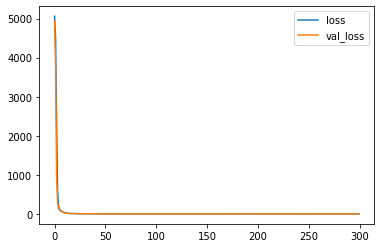

In [ ]:
lossData.plot()

Testing

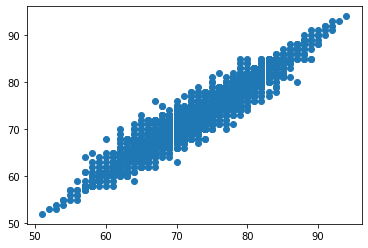

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pr = model.predict(x_test)
pr = np.rint(pr) 
mean_absolute_error(y_test,pr)
plt.scatter(y_test,pr)
plt.show()